In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [ ]:
iris = load_iris()

X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int64)

In [ ]:
perceptron_clf = Perceptron()
perceptron_clf.fit(X, y)

y_pred = perceptron_clf.predict([[2, 0.5]])

In [ ]:
y_pred

array([0])

## Installs

In [ ]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 92.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


## TensorFlow, Keras & Outros

#### Classificação de Imagens

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
keras.__version__

'3.5.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
class_name = ['T-shirt/top',
              'Trouser',
              'Pullover',
              'Dress',
              'Coat',
              'Sandal',
              'Shirt',
              'Sneaker',
              'Bag',
              'Ankle boot']

In [ ]:
class_name[y_train[0]]

'Coat'

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
hidden1 = model.layers[1]

In [ ]:
hidden1.name

'dense'

In [ ]:
model.get_layer('dense_2')

<Dense name=dense_2, built=True>

In [ ]:
w, b = hidden1.get_weights()

In [ ]:
w

array([[ 0.05142465,  0.00547509, -0.05780727, ..., -0.06545715,
        -0.03224082, -0.06338765],
       [ 0.00823301,  0.0659371 ,  0.06731227, ...,  0.04106925,
        -0.07233147, -0.03510779],
       [ 0.03042766, -0.06892272, -0.04233045, ..., -0.0520018 ,
        -0.04040057,  0.06659299],
       ...,
       [-0.06773821, -0.05906145,  0.05240932, ..., -0.02907342,
        -0.01343222, -0.01313901],
       [ 0.03687492,  0.05022443,  0.04115243, ...,  0.00029067,
         0.01025394,  0.03470068],
       [-0.07259525, -0.05890613, -0.00823964, ...,  0.06133652,
        -0.02059874,  0.06745614]], dtype=float32)

In [ ]:
w.shape

(784, 300)

In [ ]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
b.shape

(300,)

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=.001),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7818 - loss: 0.6697 - val_accuracy: 0.7994 - val_loss: 0.6265
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7976 - loss: 0.6256 - val_accuracy: 0.8074 - val_loss: 0.5903
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8108 - loss: 0.5830 - val_accuracy: 0.8200 - val_loss: 0.5601
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8145 - loss: 0.5583 - val_accuracy: 0.8250 - val_loss: 0.5398
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8206 - loss: 0.5425 - val_accuracy: 0.8292 - val_loss: 0.5218
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8231 - loss: 0.5283 - val_accuracy: 0.8364 - val_loss: 0.5081
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8239 - loss: 0.5154 - val_accuracy: 0.8374 - val_loss: 0.4968
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8294 - loss: 0.5021 -

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

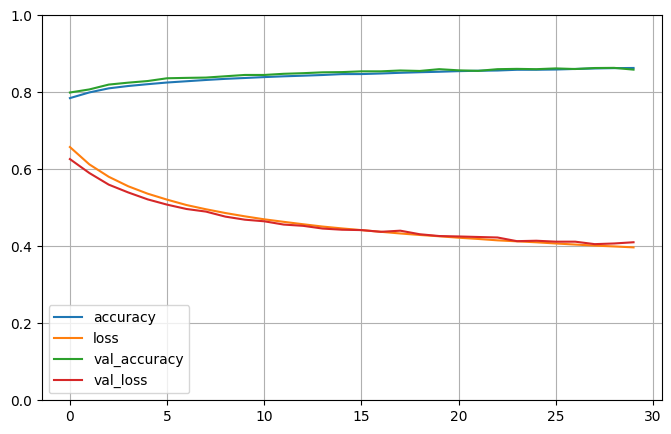

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8085 - loss: 80.7959


[86.41710662841797, 0.8025000095367432]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([9, 2, 1])

In [ ]:
np.array(class_name)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

#### Regressão

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
regression_model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
regression_model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.SGD()
)

In [ ]:
regression_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
regression_history = regression_model.fit(X_train, y_train, epochs=20,
                                          validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6567 - val_loss: 0.5628
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5494 - val_loss: 0.4923
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4738 - val_loss: 0.4662
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4618 - val_loss: 0.4568
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4721 - val_loss: 0.4459
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4489 - val_loss: 0.4380
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4606 - val_loss: 0.4339
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4359 - val_loss: 0.4307
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4182 - val_loss: 0.4201
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4161 - val_loss: 0.4158
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4178 - val_loss: 0.4117
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
mse_test = regression_model.evaluate(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3944


0.3762771785259247

In [ ]:
X_new = X_test[:3]
y_pred = regression_model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


array([[1.3556886],
       [2.8761497],
       [2.0290985]], dtype=float32)

In [ ]:
# DNN

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat_ = keras.layers.Concatenate()([input_, hidden2])
output_ = keras.layers.Dense(1)(concat_)
regression_model = keras.Model(inputs=[input_], outputs=[output_])

In [ ]:
# Compilar aqui a DNN

In [ ]:
# Treinar aqui a DNN

In [ ]:
# DNN (multi inputs)

input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1_ = keras.layers.Dense(30, activation='relu')(input_B)
hidden2_ = keras.layers.Dense(30, activation='relu')(hidden1_)
concat_all = keras.layers.concatenate([input_A, hidden2_])
output_2 = keras.layers.Dense(1, name='output')(concat_all)
regression_model_2 = keras.Model(inputs=[input_A, input_B], outputs=[output_2])

In [ ]:
regression_model_2.compile(
    loss='mse',
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [ ]:
history_2 = regression_model_2.fit(
    (X_train_A, X_train_B), y_train,
    epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid)
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3765 - val_loss: 1.2340
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0339 - val_loss: 0.7296
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7057 - val_loss: 0.6447
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6262 - val_loss: 0.6140
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6171 - val_loss: 0.5943
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5943 - val_loss: 0.5778
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5476 - val_loss: 0.5646
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5645 - val_loss: 0.5529
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5520 - val_loss: 0.5426
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5349 - val_loss: 0.5348
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5226 - val_loss: 0.5273
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
mse_test_2 = regression_model_2.evaluate((X_test_A, X_test_B), y_test)
mse_test_2

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4894


0.47501206398010254

In [ ]:
y_pred_2 = regression_model_2.predict((X_new_A, X_new_B))
y_pred_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[1.6909788],
       [2.5265582],
       [1.6867201]], dtype=float32)

In [ ]:
# DNN (multi inputs) + output extra

input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1_ = keras.layers.Dense(30, activation='relu')(input_B)
hidden2_ = keras.layers.Dense(30, activation='relu')(hidden1_)
concat_all = keras.layers.concatenate([input_A, hidden2_])
output_2 = keras.layers.Dense(1, name='output')(concat_all)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2_)
regression_model_2 = keras.Model(inputs=[input_A, input_B], outputs=[output_2, aux_output])

In [ ]:
regression_model_2.compile(
    loss=['mse', 'mse'],
    loss_weights=[0.9, 0.1],
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'my_first_keras_model.keras',
    save_best_only=True
)

In [ ]:
from gc import callbacks
history_2 = regression_model_2.fit(
    [X_train_A, X_train_B],
    [y_train, y_train],
    epochs=20,
    callbacks=[checkpoint_cb],
    validation_data=(
        [X_valid_A, X_valid_B],
        [y_valid, y_valid]
        )
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - aux_output_loss: 0.0747 - loss: 0.4819 - output_loss: 0.4072 - val_aux_output_loss: 0.0746 - val_loss: 0.4800 - val_output_loss: 0.4054
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_loss: 0.0727 - loss: 0.4627 - output_loss: 0.3901 - val_aux_output_loss: 0.0742 - val_loss: 0.4783 - val_output_loss: 0.4042
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.0751 - loss: 0.4919 - output_loss: 0.4168 - val_aux_output_loss: 0.0736 - val_loss: 0.4767 - val_output_loss: 0.4031
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.0719 - loss: 0.4706 - output_loss: 0.3987 - val_aux_output_loss: 0.0732 - val_loss: 0.4747 - val_output_loss: 0.4016
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.0704 - loss: 0.4591 - output_loss: 0.3886 - val_aux_output_loss: 0.0727 - val_loss: 0.4736 - val_output_loss: 0.4009
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [ ]:
# Checkpoints + Saving only the best model

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'my_first_keras_model.keras',
    save_best_only=True
)

In [ ]:
# Early Stop + Restore best weights

early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

In [ ]:
from gc import callbacks
history_2 = regression_model_2.fit(
    [X_train_A, X_train_B],
    [y_train, y_train],
    epochs=20,
    callbacks=[checkpoint_cb, early_stopping_cb],
    validation_data=(
        [X_valid_A, X_valid_B],
        [y_valid, y_valid]
        )
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - aux_output_loss: 0.0664 - loss: 0.4477 - output_loss: 0.3812 - val_aux_output_loss: 0.0674 - val_loss: 0.4538 - val_output_loss: 0.3864
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - aux_output_loss: 0.0657 - loss: 0.4318 - output_loss: 0.3661 - val_aux_output_loss: 0.0672 - val_loss: 0.4512 - val_output_loss: 0.3841
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - aux_output_loss: 0.0661 - loss: 0.4513 - output_loss: 0.3851 - val_aux_output_loss: 0.0669 - val_loss: 0.4510 - val_output_loss: 0.3841
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.0670 - loss: 0.4486 - output_loss: 0.3815 - val_aux_output_loss: 0.0667 - val_loss: 0.4504 - val_output_loss: 0.3837
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 0.0684 - loss: 0.4629 - output_loss: 0.3945 - val_aux_output_loss: 0.0665 - val_loss: 0.4485 - val_output_loss: 0.3820
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [ ]:
total_loss, main_loss, aux_loss = regression_model_2.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

print('Total Loss: {}'.format(total_loss))
print('Main Loss: {}'.format(main_loss))
print('Aux. Loss: {}'.format(aux_loss))

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - aux_output_loss: 0.0919 - loss: 0.5443 - output_loss: 0.4524
Total Loss: 0.5292032957077026
Main Loss: 0.4378586411476135
Aux. Loss: 0.09120433777570724


In [ ]:
y_pred_main, y_pred_aux = regression_model_2.predict(
    [X_new_A, X_new_B]
)

print('Main Predictions: {}'.format(y_pred_main))
print('Aux. Predictions: {}'.format(y_pred_aux))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Main Predictions: [[1.798358 ]
 [2.5313435]
 [1.5176265]]
Aux. Predictions: [[2.31884  ]
 [2.2048228]
 [2.0732145]]


In [ ]:
regression_model_2.save('keras_regression_model.keras')

In [ ]:
# Custom Callback

class PrintTrainRatioCallBack(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs['val_loss']/logs['loss']))

In [ ]:
# Subclassing API

class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, input_B])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output


subclass_model = WideAndDeepModel()

In [ ]:
# DNN

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat_ = keras.layers.Concatenate()([input_, hidden2])
output_ = keras.layers.Dense(1)(concat_)
regression_model_3 = keras.Model(inputs=[input_], outputs=[output_])

In [ ]:
regression_model_3.compile(
    loss='mse',
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

In [ ]:
import os

root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
  import time
  run_id = time.strftime('run_%Y_%m_%D-%H_%M_%S')
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history_3 = regression_model_3.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_cb]
)

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.8911 - val_loss: 0.8619
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7464 - val_loss: 0.6321
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6331 - val_loss: 0.6038
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5871 - val_loss: 0.5848
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5819 - val_loss: 0.5686
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5499 - val_loss: 0.5539
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5518 - val_loss: 0.5419
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5307 - val_loss: 0.5305
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5447 - val_loss: 0.5223
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5097 - val_loss: 0.5147
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5240 - val_loss: 0.5074
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
!tensorboard --logdir=.my_logs/ --port=6006

2024-12-15 15:12:56.221111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734275576.275348   40882 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734275576.292959   40882 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-15 15:13:01.376975: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, u